This notebook will calculate a paleointensity estimate for a sample by modelling its behaviour during CRM acqusition using a FORC diagram, and when combined with the AF demagnetization spectras of NRM and SIRM this will provide an estimate which will be automatically saved. 

The Cell below imports the functions and packages needed for Preisach TRM palaeointensity method to run

In [1]:
import functions as pf
import time
import threading

 The cell below will ask you for the name of the sample to test and search within the current directory for the FORC data (samplename.frc) file, the NRM AF demagnetisation data (samplename.nrm) and the the SIRM AF demagnetisation data (samplename.sirm) files. AF demagnetsation data should be in generic Magic format. 
 
 In this section you will be asked for an expected field intensity range, the cooling time during TRM acquisition and the Curie temperature of the main magnetic carrier. 
 
 You will also be shown the zdjerveld plot for the data and be asked to input the AF step where the primary magnetisation component begins, you can zoom in on the plot to help with this. If you canot identify the primary componant with the three projections included we suggest you use a more suitable program to determine the AF step. 


Please enter the sample name: L4
Sample to test: L4
Attempt 1 of running sample L4
The standard field bounds are 40 μT to 60 μT, if you want to keep these enter K, else enter any other charactor:K
Input the natural growth rate in hours:1E-13
Input Curie temperature in °C:350


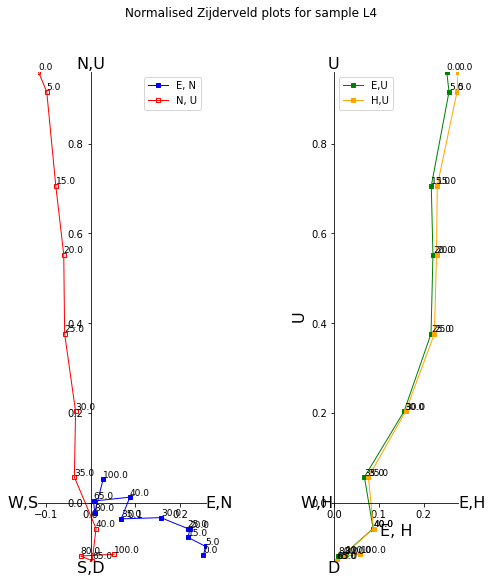

Would you like to zoom in the zplot to make your decison (you can do this multiple times)? (Y or N)N
Pick the AF demag step where the primary componant is identified:5
Selected AF step: 5


In [2]:
if ('X' in locals()) == False:
    X = {}
V = {}
X = pf.find_files2(X)
X = pf.demag_data_generic2(X)
X = pf.proccess_all(X)
X = pf.prod_FORCs(X)
X = pf.plot_zplot(X)

#plot for example 

#list of hc and hi 
#2 different hc values and small hi
hctest = 10.
hctest = 50.
hitest = 1.
hitest = 1.

This cell will calcualte the full width at half maximum to determine the FORC distribution at smoothing factor zero for the model. It will ask you to check there are no noisy FORC diagrams giving unreaslitic FWHMs - if a point on th ebet fit graph lies ar from the line of best fit, remove it. The right hand plot should be a straight line with a slight positive gradient. You can remove anamolous plots, and select the smallest SF which gives reliable data and this will be plotted below.  

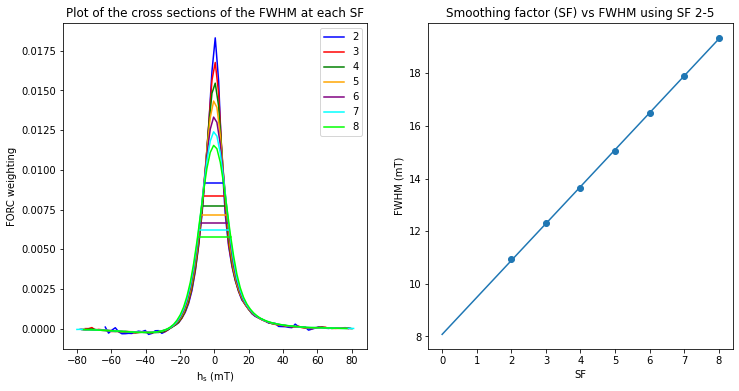

1st attempt 0.008078784964496984 [0.010938715841753328, 0.012305342242079355, 0.013624575027341716, 0.01505451976583446, 0.01649887493221666, 0.017906034209941035, 0.019346235226732664]
1st [0.010938715841753328, 0.012305342242079355, 0.013624575027341716, 0.01505451976583446, 0.01649887493221666, 0.017906034209941035, 0.019346235226732664] 8
Are any of the FWHM unreliable? Enter Y or N: N
1 [0.010938715841753328, 0.012305342242079355, 0.013624575027341716, 0.01505451976583446, 0.01649887493221666, 0.017906034209941035, 0.019346235226732664]
redoing the calcualtion
looking for che [0.010938715841753328, 0.012305342242079355, 0.013624575027341716, 0.01505451976583446, 0.01649887493221666, 0.017906034209941035, 0.019346235226732664]
removed the nan and che [0.01093872 0.01230534 0.01362458 0.01505452 0.01649887 0.01790603
 0.01934624]
redoing calcualtion the results 0.008078784964496984
new fwhmlist [0.010938715841753328, 0.012305342242079355, 0.013624575027341716, 0.01505451976583446, 0

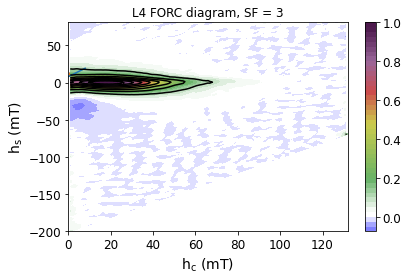

Do you want to change the maximum hc and/or hi value from max hc = 120.0 and max hi = 70.0 from thr FORC file? (Y or N)Y
Set maximum hc (mT) using the above FORC diagram, if unchanged enter 0:100
Set absolute maximum hi (mT) using the above FORC diagram, if unchanged enter 0:40
Enter Y or N
FORC limits: Max hc = 100.0, max hi = 40.0


In [4]:
X = pf.find_plot_fwhm(X)
X = pf.check_fwhm(X) 
X = pf.pick_SF(X)
X = pf.divide_mu0(X) 
X = pf.sym_norm_forcs(X)
pf.norm_rho_all(X) #keep as was  
pf.plot_sample_FORC(X['Hc'], X['Hu'], X['rho_n'], X['SF'], X['name'])
X = pf.user_input(X)

In [ ]:
import numpy as np
print(X['rho'])
print(X['Hc'])
print(X['Hu'])
#find minimun but excluding edges, not in full shape
print(np.shape(X['rho']))
print(np.shape(X['Hc']))
print(np.shape(X['Hu']))



In [ ]:
import numpy as np
print(np.nanmax(X['Rho']))

In [ ]:
#X = pf.pick_SF(X)
#X = pf.divide_mu0(X) 
#X = pf.sym_norm_forcs(X)
pf.norm_rho_all(X) #keep as was  

pf.plot_sample_FORC(X['Hc'], X['Hu'], X['rho_n'], 4, X['name'])

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def plot_sample_FORC(x, y, z, SF, sample_name):
    z = z[SF]
    zn = np.copy(z)

    xp = x*1000
    yp = y*1000

    con = np.linspace(0.1, 1, 9)

    cmap, vmin, vmax = pf.FORCinel_colormap(zn) #runs FORCinel colormap

    plt.contourf(xp, yp, zn, 50, cmap= cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(ticks=[0,0.2, 0.4, 0.6, 0.8, 1], format = '%.1f')
    plt.contour(xp, yp, zn, con, colors = 'k')
    plt.xlabel('$\mathrm{h_{c}}$ (mT)', fontsize=14)
    plt.ylabel('$\mathrm{h_{s}}$ (mT)', fontsize=14)

    plt.xlim(0, 50)
    plt.ylim(-30, 30)
    plt.tick_params(axis='both', which='major', labelsize=12)

    cbar.ax.tick_params(labelsize=12)
    plt.title('{} FORC diagram, SF = {}'.format(sample_name, SF))

    plt.tight_layout()
    plt.savefig('FORC_diagram_SF_{}_{}.pdf'.format(SF, sample_name))
    #path = os.getcwd
    #plt.savefig(path + os.sep+'sample_{}_V_{}'.format(sample_name, sample_copy) + os.sep+'FORC_diagram_sample_{}_SF_{}.pdf'.format(sample_name,SF))
    plt.show
    plt.pause(1)
    return     
plot_sample_FORC(X['Hc'], X['Hu'], X['rho_n'], 3, X['name'])

In [ ]:
print(X['Hc'])
print(X['Hb1'])
print(X['Hu'])

The next section will model CRM acquistion and use the NRM and ARM data to calculate the paleointensity (This takes ~ 3 minutes)

In [5]:
start = time.time()
thread = pf.ElapsedTimeThread() #removed the print from this - need to add back in
thread.start()
X, V = pf.CRM_acq(X, V)
time.sleep(5)
# something is finished so stop the thread
thread.stop()
thread.join()
print() # empty print() to output a newline
print("Finished in {:.3f} seconds".format(time.time()-start))



number hys 100000
corr 0.6565266374201902


C:\Users\evieb\OneDrive - Imperial College London\PhD\thesis\intensity_chapter\test_off\L4\functions.py:2391: RuntimeWarning: divide by zero encountered in true_divide
  v_act = (kb*tempt)/(hf*mu0*ms)
C:\Users\evieb\OneDrive - Imperial College London\PhD\thesis\intensity_chapter\test_off\L4\functions.py:2447: RuntimeWarning: invalid value encountered in double_scalars
  bracket = 1-(2*ht*phitemp/hc)**(1/g)
C:\Users\evieb\Anaconda3\lib\site-packages\numba\core\dispatcher.py:241: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ModuleNotFoundError(No module named 'numba_scipy')'.
  entrypoints.init_all()


arm 1044.5642401364298
number hys 100000
corr 0.6565266374201902


C:\Users\evieb\OneDrive - Imperial College London\PhD\thesis\intensity_chapter\test_off\L4\functions.py:2391: RuntimeWarning: divide by zero encountered in true_divide
  v_act = (kb*tempt)/(hf*mu0*ms)
C:\Users\evieb\OneDrive - Imperial College London\PhD\thesis\intensity_chapter\test_off\L4\functions.py:2447: RuntimeWarning: invalid value encountered in double_scalars
  bracket = 1-(2*ht*phitemp/hc)**(1/g)


arm 1100.072577442621
number hys 100000
corr 0.6565266374201902
arm 1040.9903687089854
number hys 100000
corr 0.6565266374201902
arm 1052.8003107859527

Finished in 1660.221 seconds


In [32]:
#orthogonal projection 
#code from https://saturncloud.io/blog/how-to-perform-orthogonal-regression-fitting-using-scipy-least-squares-method/
import scipy.optimize as opt

def orthogonal_distance(params, x, y):
    m, b = params
    return (y - (m * x + b)) / np.sqrt(1 + m ** 2)

def orthogonal_regression(x, y):
    initial_guess = [1.0, 1.0]
    params, _ = opt.leastsq(orthogonal_distance, initial_guess, args=(x, y))
    #residuals = orthogonal_distance(params, x, y)
    return params #, residuals

### Run below to set up functions 

In [33]:
def calc_PI_checks_SIRM(V,X):
    mu0 = 4.*pi*1e-7
    sirm = V['sirm']
    print('sirm', V['sirm'])

    #arm = V['arm']
    #print('arm', arm)
    cntfield = X['cntfield']
    name = X['name']
    ifield = V['ifield']
    demagstep = X['af_step']
    #set first value as v v low just so remove zeros to plot easily
    demagstep2 = demagstep
    demagstep2[0] = 0.0001
    demagstep2 = demagstep2[demagstep2 != 0]
    sirm2 = sirm
    sirmn = np.copy(sirm2) #this is normalising the sirm demag
    for i in range(V['ifield']):
        for j in range(cntfield): #change back to 23 
            sirmn[i][j] = (sirm2[i][j]/(np.mean(sirm2[i][0:3]))) #norm by 3

    af_sirm_n = X['af_sirm']
    norm = np.mean(af_sirm_n[0:3])
    af_sirm_n_n = np.copy(af_sirm_n)
    for i in range(len(af_sirm_n)):
        af_sirm_n_n[i] = af_sirm_n[i]/norm

    V['af_sirm_n_n'] = af_sirm_n_n

    sirm_p = sirmn[:ifield,:cntfield] #change 4 to no fields
    #write to file at some point
    V['sirm_plot'] = sirm_p[2]

    #normalise ARM demag

    #arm2 = arm
    #armn = np.copy(arm2) #this is normalising the sirm demag
    #for i in range(V['ifield']):
    #    for j in range(cntfield): #change back to 23 
    #        armn[i][j] = (arm2[i][j]/(np.mean(arm2[i][0])))

    #af_arm_n = X['af_arm']
    #norm = np.mean(af_arm_n[0])
    #af_arm_n_n = np.copy(af_arm_n)
    #for i in range(len(af_arm_n)):
    #    af_arm_n_n[i] = af_arm_n[i]/norm

    #V['af_arm_n_n'] = af_arm_n_n

    #arm_p = armn[:ifield,:cntfield] #change 4 to no fields
    #write to file at some point
    #V['arm_plot'] = arm_p[2]
    ###################
    afpick = X['af_pick'] #6 #pick from user - Z-plot

    #prepare CRM demag 
    afmag = V['afmag'] #simulated af demag
    afmag2 = afmag
    afmagn = np.copy(afmag2)
    #norm_afmag = afmag2[i][afpick]
    for i in range(V['ifield']):
        for j in range(cntfield): #change back to 23 
            afmagn[i][j] = (afmag2[i][j]/(afmag2[i][afpick])) # norm to max not first 3 

    af_nrm_n = X['af_nrm']
    norm_af = af_nrm_n[afpick]
    af_nrm_n_n = np.copy(af_nrm_n)
    for i in range(len(af_nrm_n_n)):
        af_nrm_n_n[i] = af_nrm_n[i]/norm_af
    
    V['af_nrm_n_n'] = af_nrm_n_n
    V['afmagn'] = afmagn

    #V['af_arm_n_n'] = af_arm_n_n

    #arm_p = armn[:ifield,:cntfield] #change 4 to no fields
    #write to file at some point
    #V['arm_plot'] = arm_p[2]



    #initiate figure
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,5))
    #w, h = figaspect(1)
    #fig, ax = plt.subplots(figsize=(w,h))
    #ax1.set(aspect=1)
    ax1.plot(demagstep2, sirm_p[2], marker = 'o', color = 'r', label = 'simulated') #x = 22, y = 100 one plotted is largest field? - all same
    ax1.plot(demagstep2, af_sirm_n_n, marker = 'o', color = 'b', label = 'measured')        
    ax1.set_ylim(0,1.3)
    ax1.set_xlim(0,np.nanmax(demagstep2))
    ax1.set_ylabel('SIRM (normalised)')
    ax1.set_xlabel('AF peak (mT)')
    ax1.legend(loc='upper right')
    ax1.set_title('SIRM demagnetization spectra for sample {}'.format(name))
    ax1.grid()

    # get rest ready 
    #afmag = V['afmag'] #simulated af demag
    #measured data
    #af_nrm_n = X['af_nrm'] 
    #af_arm_n = X['af_arm']
    name = X['name']
    fields = V['fields']
    af_step = X['af_step']




    #######################
    sit = ifield

    ys = np.zeros((100))

    cntfieldaf = cntfield

    af_step_list = []
    shortdiv = np.zeros((cntfield))
    shortminus = np.zeros((cntfield))

    res = []
    flat = 0 #set here as well as earlier to save time when testing
    afratio = 0
    #do the shortdiv etc seperate

    for i in range(cntfieldaf): #cntfieldsaf
        #likely remove this -----
        xlist = []
        ylist = []
        sumx = 0.
        sumy = 0.
        sumxy = 0.
        sumxx = 0.
        #print('afmag', afmag)
        #print('sit', sit) #sit is field
        #print('i', i)
        #print('arm', arm)
        af_sirm = afmag[:sit,i]/sirm[:sit,i] #changed to divide by max value
        field_t = fields[:sit]*mu0*1E6
        af_sirm_new = np.zeros((int(sit+1)))
        field_t_new = np.zeros((int(sit+1)))
        af_sirm_new[1:] = af_sirm
        field_t_new[1:] = field_t
        #print(af_arm_new)
        #print(field_t_new)
        #print('af_arm_new', af_arm_new)
        #print('field_t_new', field_t_new)
        #p,residuals, _, _, _ = np.polyfit((afmag[:sit,i]/sirm[:sit,i]), (fields[:sit]*mu0*1E6), 1, full = True) # not need loop- all fields for each point  
        #p,residuals, _, _, _ = np.polyfit((af_sirm_new), (field_t_new), 1, full = True)
        



        #p,residuals, _, _, _ = np.polyfit((af_arm_new), (field_t_new), 1, full = True)
        #mfit = p[0]
        #cfit = p[1]
        
        # Calculate the predicted y values based on the regression line
        #y_predicted = m * x + b

        # Calculate the residuals (differences between actual and predicted y values)
        #residuals = y - y_predicted

        # Calculate the R-squared value
        # R-squared = 1 - (SSR / SST), where SSR is the sum of squared residuals and SST is the total sum of squares
        #SSR = np.sum(residuals ** 2)
        #SST = np.sum((field_t_new - np.mean(field_t_new)) ** 2)
        #r_squared = 1 - (SSR / SST)

        #print("Slope (m):", m)
        #print("Intercept (b):", b)
        #print("R-squared:", r_squared)
        m, b = orthogonal_regression(af_sirm_new, field_t_new) 
        #params, residuals
        #mfit = params[0] #m
        #cfit = params[1] #b
        mfit = m
        cfit = b
        #res.append(residuals)
        #print(residuals**2)
        # ----------- to here 
        x = af_nrm_n[i]/af_sirm_n[i]   #change this to norm by max measured value
        y = x*mfit +cfit #field assoacted witht his step for demag  
        xline= np.linspace(0, np.max(af_sirm_new))
        yline = xline*mfit + cfit
        ys[i] = y
        plt.scatter(x,y, label = 'guess')
        plt.scatter(af_sirm_new, field_t_new, label = 'modelled')
        plt.plot(xline,yline, label = 'line')
        plt.legend()
        plt.savefig('line2_{}.pdf'.format(i))
        plt.close()
        print(np.sum(residuals))
        j = sit-1
        #include these divides for plotting at each point - rewrite as arrays 
        shortdiv[i]=(1-((sirm[j-1,i]/np.mean(sirm[j-1,0]))/(af_sirm_n[i]/np.mean(af_sirm_n[0]))))*100 #do for 3rd field
        shortminus[i]=(((sirm[j-1,i]/np.mean(sirm[j-1,0]))-(af_sirm_n[i]/np.mean(af_sirm_n[0]))))*100
        af_step_list.append(af_step[i])

    #do 2 plots and finish figure and write the data to files then can add in rest

    #middle fig
    af_step_list = X['af_step']
    
    twenty = []
    hundred = []

    for i in range(len(af_step_list)):
        twenty.append(20)
        hundred.append(100)

    ax2.plot(af_step_list, twenty, 'b') #af step list is just af_step?
    ax2.plot(af_step_list, hundred, 'r')
    ax2.set_ylim(-130,130)
    ax2.plot([af_step_list[0], af_step_list[-1]], [-20, -20], 'b') #af step list is just af_step?
    ax2.plot([af_step_list[0], af_step_list[-1]], [-100, -100], 'r')
    ax2.plot(af_step_list, shortdiv,  marker='o', color= 'r', label='S$_{ratio}$')
    ax2.plot(af_step_list, shortminus,  marker='o', color = 'b', label = 'S$_{diff}$')
    ax2.set_title('SIRM checks for sample {}'.format(name))
    ax2.set_xlabel('AF peak (mT)')
    ax2.set_ylabel('S$_{diff}$ or S$_{ratio}$ (%)')
    ax2.set_xlim(0,np.nanmax(af_step_list))
    #ax2.set_ylim(min(np.min(shortdiv), np.min(shortminus), -100),max(np.max(shortdiv), np.max(shortminus), 100))
    ax2.legend(loc='upper right')
    ax2.grid()

    #plot PI estimates - mark where SIRM checks fit + in file write the values and also sigm for each point

    ax3.plot(af_step_list,ys[:len(af_step_list)], 'b', label = 'All')
    ax3.plot(af_step_list,ys[:len(af_step_list)],  marker='o', color= 'b')
    ax3.set_ylim(0,100)
    #plot ones which are accepted by SIRM checks in diff colour and after af pick here
    #ax3.plot(af_step_list,ys[:len(af_step_list)], 'b', label = 'Pass')
    #ax3.plot(af_step_list,ys[:len(af_step_list)],  marker='o', color= 'b')
    #plot vertical line
    
    ax3.plot([af_step_list[afpick], af_step_list[afpick]], [0,np.max(ys[:len(af_step)])], color = 'green')
    #plt.plot(af_step[8:20],ys[8:20],  marker='o', color= 'r')
    ax3.set_xlim(0,np.nanmax(af_step_list))
    #ax3.set_ylim(0,np.nanmax(ys[:len(af_step)]))
    #plt.text(20, 6, r'selected median: %.2f $\mu$T'%selected_med, fontsize=11)
    #plt.text(20, 7, r'rejected mean: %.2f $\pm$ %.2f $\mu$T'%(selected_mean ,mean_dev), fontsize=11)
    #plt.text(20, 6, r'selected median: %.2f $\mu$ T'%selected_med, fontsize=12)
    ax3.set_xlabel('AF peak (mT)')
    ax3.set_ylabel('paleointensity (\u03BCT)')
    ax3.grid()
    ax3.set_title('PI for each AF step for sample {}'.format(name))

    ax4.plot(demagstep2, afmagn[0], marker = 'o', color = 'r', label = 'simulated CRM 1 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, afmagn[1], marker = 'o', color = 'r', label = 'simulated CRM 2 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, afmagn[2], marker = 'o', color = 'r', label = 'simulated CRM 3 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, afmagn[3], marker = 'o', color = 'r', label = 'simulated CRM 4 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, af_nrm_n_n, marker = 'o', color = 'b', label = 'measured NRM')        
    ax4.set_ylim(0,1.3)
    ax4.set_xlim(0,np.nanmax(demagstep2))
    ax4.set_ylabel('NRM or CRM (normalized to max NRM or CRM)')
    ax4.set_xlabel('AF peak (mT)')
    ax4.legend(loc='upper right')
    ax4.set_title('NRM and CRM demagnetization spectra for sample {}'.format(name))
    ax4.grid()

    # get rest ready 
    afmag = V['afmag'] #simulated af demag
    #measured data
    af_nrm_n = X['af_nrm'] 
    #af_arm_n = X['af_arm']
    name = X['name']
    fields = V['fields']
    af_step = X['af_step']


    plt.show()
    #------------ to here 

    #write to the file 

    #write lots of data files 
    #make directory for folder and save all these ine tc 

    #path = os.getcwd()
    #fall = open(path + os.sep+'sample_{}_V_{}'.format(name,(X['sample_copy'])) + os.sep+'full_data_sample_{}_run_{}.dat'.format(name,(X['sample_copy'])), 'w')
    #fall.write('Sample \t Run \t AF step \t PI est \SRR \t meaured NRM/SIRM \t meausured SIRM/SIRM_) = \tsimulated SIRM/SIRM_0 \t SIRM ratio \t SIRM diff')
    #for i in range(cntfield):
    #    fall.write(str(name) + '\t' + str(X['sample_copy']) + '\t' + str(af_step_list[i]) + '\t' + str(ys[i]) + '\t' + str(res[i]) + '\t' + str(af_nrm_n[i]/af_sirm_n[i]) + '\t' + str(af_sirm_n[i]) + '/t' + str(sirm_p[2]) + '\t' + str(shortminus[i]) + '\t' + str(shortdiv[i]) + '\n')
    #fall.close()

    V['shortdiv'] = shortdiv
    V['shortminus'] = shortminus
    V['ys'] = ys  

    return(X,V)

def fin_pal_SIRM(X,V):
    ys = V['ys']
    af_step = X['af_step']
    name = X['name']
    cntfield = X['cntfield']
    
    while True:
            low_b_val = (input("Pick the AF step for the lower bound of the platau palaeointensity region to calcualte the median palaeointensity from:"))
            
            #print(type(afpick))
            try:
                low_b1 = np.where(af_step == float(low_b_val))
                low_b = int(low_b1[0])
                if (low_b >= 0) and (low_b <= cntfield): #within range of AF demag steps - may break if pick too high
                    #print('in bounds')
                    break
            except:
                print('Not an AF step')
                True
           # if (isinstance(sf_choose, int)):
                #print('int')
            
    while True:
            up_b_val = (input("Pick the AF step for the upper bound of the platau palaeointensity region to calcualte the median palaeointensity from:"))
            
            try:
                up_b1 = np.where(af_step == float(up_b_val))
                up_b = int(up_b1[0])
                if (up_b >= low_b) and (up_b <= cntfield): #within range of AF demag steps - may break if pick too high
                    
                    break
                else:
                    print('out of bounds, must be above the lower bound')
            except :
                print('Not an AF step')
                True
           # if (isinstance(sf_choose, int)):
                #print('int')
            
            #plot restulting  same graoh with labelled in red and wiht median etc 
            
    ys = V['ys']
    af_step = X['af_step']

    #plot final figure 
 
    name = X['name']

    #initiate figure
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,5))
    #w, h = figaspect(1)
    #fig, ax = plt.subplots(figsize=(w,h))
    #ax1.set(aspect=1)
    ax1.plot(af_step, V['sirm_plot'], marker = 'o', color = 'r', label = 'simulated') #x = 22, y = 100 one plotted is largest field? - all same
    ax1.plot(af_step, V['af_sirm_n_n'], marker = 'o', color = 'b', label = 'measured')     
    ax1.set_ylim(0,1.3)
    ax1.set_xlim(0,np.nanmax(af_step))
    ax1.set_ylabel('normalised SIRM')
    ax1.set_xlabel('AF peak (mT)')
    ax1.legend(loc='upper right')
    ax1.set_title('SIRM AF spectra')
    ax1.grid()

    # get rest ready 
    afmag = V['afmag'] #simulated af demag
    #measured data
    af_nrm_n = X['af_nrm'] 
    af_sirm_n = X['af_sirm']
    name = X['name']
    fields = V['fields']
    af_step = X['af_step']


    ###################
    afpick = X['af_pick'] #6 #pick from user - Z-plot

    
    twenty = []
    hundred = []

    for i in range(len(af_step)):
        twenty.append(20)
        hundred.append(100)


    ax2.plot(af_step, twenty, 'b') #af step list is just af_step?
    ax2.plot(af_step, hundred, 'r')
    ax2.set_ylim(-130,130)
    ax2.plot([af_step[0], af_step[-1]], [-20, -20], 'b') #af step list is just af_step?
    ax2.plot([af_step[0], af_step[-1]], [-100, -100], 'r')
    ax2.plot(af_step, V['shortdiv'],  marker='o', color= 'r', label='S$_{ratio}$')
    ax2.plot(af_step, V['shortminus'],  marker='o', color = 'b', label = 'S$_{diff}$')
    ax2.set_title('SIRM checks')
    ax2.set_xlabel('AF peak (mT)')
    ax2.set_ylabel('S$_{diff}$ or S$_{ratio}$ (%)')
    ax2.set_xlim(0,np.nanmax(af_step))
    #ax2.set_ylim(min(np.min(shortdiv), np.min(shortminus), -100),max(np.max(shortdiv), np.max(shortminus), 100))
    ax2.legend(loc='upper right')
    ax2.grid()



    #plot PI estimates - mark where SIRM checks fit + in file write the values and also sigm for each point

    ax3.plot(af_step,ys[:len(af_step)], 'b', label = 'All')
    ax3.plot(af_step,ys[:len(af_step)],  marker='o', color= 'b')
    ax3.set_ylim(0, 100)
    #plot ones which are accepted by SIRM checks in diff colour and after af pick here
    #ax3.plot(af_step_list,ys[:len(af_step_list)], 'b', label = 'Pass')
    #ax3.plot(af_step_list,ys[:len(af_step_list)],  marker='o', color= 'b')
    #plot vertical line
    
    ax3.set_xlim(0,np.nanmax(af_step))
    ax3.set_ylim(0,(np.max(ys) + 0.1*np.max(ys)))
    ax3.set_ylim(0,50)
    #plot with red colour and calc average
    selected_mean = np.mean(ys[low_b:up_b+1]) #check these include these values
    mean_dev = np.std(ys[low_b:up_b+1])
    selected_med = np.median(ys[low_b:up_b+1])
    q3, q1 = np.percentile(ys[low_b:up_b+1], [75, 25])
    iqr = q3-q1
    ax3.plot(af_step,ys[:len(af_step)], 'b')
    ax3.plot(af_step,ys[:len(af_step)],  marker='o', color= 'b')
    ax3.plot(af_step[low_b:up_b+1],ys[low_b:up_b+1],  marker='o', color= 'r')
    ax3.plot([af_step[afpick], af_step[afpick]], [0,np.max(ys[:len(af_step)])], color = 'green')   

    #ax3.text(max(af_step)/2, -(0.18*np.max(ys)), r'median: %.2f $\mu$T'%selected_med)
    #ax3.text(max(af_step)/2, -(0.25*np.max(ys)), r'mean: %.2f $\pm$ %.2f $\mu$T'%(selected_mean ,mean_dev))
    ax3.text(max(af_step)/2, 1, r'median: %.2f $\mu$T'%selected_med)
    ax3.text(max(af_step)/2, 3, r'mean: %.2f $\pm$ %.2f $\mu$T'%(selected_mean ,mean_dev))
    ax3.grid()
    ax3.set_title('PI estiamtes')
       
    ax3.set_xlabel('AF peak (mT)')
    ax3.set_ylabel('paleointensity (\u03BCT)')


    af_nrm_n_n = V['af_nrm_n_n']
    agmagn = V['afmagn']

    #add ax4
    #ax4.plot(af_step, V['afmagn'][0], marker = 'o', color = 'r', label = 'simulated CRM 1 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(af_step, V['afmagn'][1], marker = 'o', color = 'r', label = 'simulated') #x = 22, y = 100 one plotted is largest field? - all same
    #ax4.plot(af_step, V['afmagn'][2], marker = 'o', color = 'r', label = 'simulated CRM 3 ') #x = 22, y = 100 one plotted is largest field? - all same
    #ax4.plot(af_step, V['afmagn'][3], marker = 'o', color = 'r', label = 'simulated CRM 4 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(af_step, af_nrm_n_n, marker = 'o', color = 'b', label = 'measured')        
    #ax4.set_ylim(0,1.3)
    ax4.set_xlim(0,np.nanmax(af_step))
    ax4.set_ylabel('normalised CRM or NRM')
    ax4.set_xlabel('AF peak (mT)')
    ax4.legend(loc='upper right')
    ax4.set_title('(d) CRM AF spectra')
    ax4.grid()


    plt.suptitle('PI results for sample {}'.format(name))
    #print('Figure saved as PI_est_{0}.pdf'.format(name))
    path = os.getcwd()
    plt.savefig(path + os.sep+'sample_{}_V_{}'.format(name, X['sample_copy']) + os.sep+'PI_results_{}_2.pdf'.format(name))
    plt.show

    plt.pause(1)
    paleo_data = open('PI_values_{}.txt'.format(name), 'w')
    for i in range(len(af_step)):
        paleo_data.write(str(name) + '\t' + str(af_step[i]) + '\t' + str(ys[i]) + '\n')
    paleo_data.close()
    #open big file
    #bigf = open('paleo_results.dat', 'a')
    #bigf.write(str(name) + '\t' + str(X['sample_copy']) + '\t' + str(up_b-low_b) + '\t' + str(af_step[up_b]-af_step[low_b]) +'\t' + str(af_step[low_b]) + '\t' + str(af_step[up_b]) + '\t' + '{:.6f}'.format(selected_mean) + '\t' + '{:.6f}'.format(mean_dev) + '\t' + '{:.6f}'.format(selected_med) + '\t' + '{:.6f}'.format(iqr) + '\t' + str(X['min_field']) + '\t' + str(X['max_field']) + '\t' + str(X['growth_rate']) + '\t' + str(X['curie_t']) + '\t' +  str(X['afval']) + '\t' + str(X['SF']) + '\t' + str(X['reset_limit_hc']) + '\t' + str(X['reset_limit_hi']) + '\n')
    #bigf.close()
    return

In [34]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import os

sirm [[0.42051324 0.35962098 0.26286094 0.22313149 0.18074924 0.14535121
  0.1153292  0.09013213 0.02366685 0.01073258 0.0033277 ]
 [0.42652056 0.37146184 0.26830168 0.22622726 0.1837915  0.1469103
  0.11540115 0.09054648 0.02297451 0.01042737 0.00328984]
 [0.41181262 0.35585651 0.25291624 0.21397001 0.17620376 0.14182057
  0.1148463  0.08919848 0.0228215  0.01029831 0.00302816]
 [0.42358198 0.36585825 0.26347235 0.22473056 0.1818111  0.14609389
  0.11501449 0.09008643 0.02327953 0.01044579 0.00320017]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.     

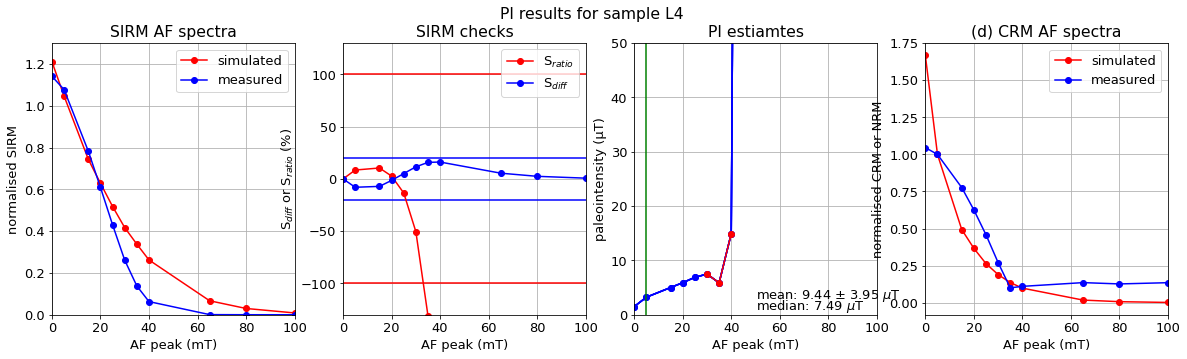

In [35]:
X, V = calc_PI_checks_SIRM(V,X)
fin_pal_SIRM(X,V)

In [ ]:
print(V['afmag'])

In [ ]:
#arm file function
import numpy as np
def plot_file_arm(V,X):
    arm_int = np.copy(V['arm']) # gives me the maximum value
    crm_int = np.copy(V['afmag']) # first af demag step for crm i think - check it from 
    sirm_int = np.copy(V['sirm']) # first af demag step for crm i think - check it from 
    #hysteron_list_copy = np.copy(V['hysteron_list'])
    #arm_acq_steps_list_copy = np.copy(V['arm_acq_steps_list'])
    #plt.scatter(arm_acq_steps_list_copy, arm_int[:len(arm_acq_steps_list_copy)])
    #plt.xlabel('number arm acq steps')
    #plt.ylabel('max ARM intensity')
    #plt.title('max ARM intensity vs number arm acq steps')
    #plt.savefig('arm_steps_vs_arm.png')
    #plt.close()
    
    for i in range(3):
        field = (V['fields']*(4*np.pi*1E-7)/1E-6)
        arm_file = open("steps_arm_crm_sirm_{}_{:.1f}.txt".format(X['name'], field[i]), "w") #'w' will overwrite file is already exists
        arm_file.write('arm_steps' + '\t' + 'arm_intensity' + '\t' + 'crm intensity' + '\t' + 'sirm intensity' + '\n') 
        for write_list in range(len(X['af_step'])):
            arm_file.write(str(X['af_step'][write_list]) + '\t' + str(arm_int[i][write_list]) + '\t' + str(crm_int[i][write_list]) + '\t' + str(sirm_int[i][write_list]) + '\n')
        arm_file.close()

In [ ]:
print((V['fields']*(4*np.pi*1E-7)/1E-6))

In [ ]:
print(V['fields'])

In [ ]:
plot_file_arm(V,X)

In [ ]:
import matplotlib.pyplot as plt
def plot_graph_crm_sirm(V,X):
    crm_int = np.copy(V['afmag']) # first af demag step for crm i think - check it from 
    sirm_int = np.copy(V['sirm']) # first af demag step for crm i think - check it from 
    for i in range(3):
        field = (V['fields']*(4*np.pi*1E-7)/1E-6)
        plt.plot(X['af_step'][:], crm_int[i][:]/sirm_int[i][:], '-o')
        plt.title('{} AF demag Field = {:.2f}'.format(X['name'], field[i]))
        plt.xlabel('AF step (mT)')
        plt.ylabel('CRM/SIRM')
        plt.savefig('CRM_SIRM_AF_{}_{}.pdf'.format(X['name'], field[i]))
        plt.close()

In [ ]:
plot_graph_crm_sirm(V,X)

In [ ]:
def plot_crm_sirm_nrm_sirm(V,X):
    crm_int = np.copy(V['afmag']) # first af demag step for crm i think - check it from 
    sirm_int = np.copy(V['sirm']) # first af demag step for crm i think - check it from 
    #measured values 
    sirm_mea = X['af_sirm']
    nrm_mea = X['af_nrm']
    for i in range(4):
        field = (V['fields']*(4*np.pi*1E-7)/1E-6)
        plt.plot(X['af_step'][:], crm_int[i][:]/sirm_int[i][:], '-o', label = 'sim {}'.format(field[i]))
    plt.plot(X['af_step'][:], nrm_mea[:]/sirm_mea[:], label = 'meas 100 muT')
    plt.title('{} AF demag Field = {:.2f}'.format(X['name'], field[i]))
    plt.xlabel('AF step (mT)')
    plt.ylabel('CRM/SIRM')
    plt.legend()
    plt.savefig('CRM_SIRM_NRM_SIRM_AF_{}.pdf'.format(X['name']))
    plt.close()

In [ ]:
plot_crm_sirm_nrm_sirm(V,X)

In [ ]:
import numpy as np
arm_int = np.copy(V['arm'][:,0]) # gives me the maximum value
crm_int = np.copy(V['afmag'][:,0]) # first af demag step for crm i think - check it from 
arm_file = open("growth_rate_vs_arm_{}.txt".format(X['names'][0]), "w") #'w' will overwrite file is already exists
arm_file.write('growth rate' + '\t' + 'arm_intensity' + '\t' + 'crm intensity' + '\n') 
growth_rate_list_copy = np.copy(V['growth_rate_list'])
for write_list in range(len(growth_rate_list_copy)):
    arm_file.write(str(growth_rate_list_copy[write_list]) + '\t' + str(arm_int[write_list]) + '\t' + str(crm_int[write_list]) + '\n')
arm_file.close()


In [ ]:
#demag lists
arm_int = np.copy(V['arm']) # gives me the maximum value
crm_int = np.copy(V['afmag']) # first af demag step for crm i think - check it from 
af_steps_print = np.copy(V['af_step'])
growth_rate_list_copy = np.copy(V['growth_rate_list'])

for num_rates in range(len(growth_rate_list_copy)):
    af_file = open("demag_crm_arm_{}_{}.txt".format(X['names'][0], V['growth_rate_list'][num_rates]), "w")
    af_file.write('AF' + '\t' + 'crm' + '\t' + 'arm' + '\n') 

    for write_list2 in range(len(af_steps_print)):
        af_file.write(str(af_steps_print[write_list2]) + '\t' + str(crm_int[num_rates][write_list2]) + '\t' + str(sirm_int[num_rates][write_list2]) + '\n')
    af_file.close()

In [ ]:
print(np.max(V['hys'][:,0]))
print(np.max(V['hys'][:,1]))

In [ ]:
from matplotlib import pyplot as plt
plt.hexbin(V['hys'][:,0], V['hys'][:,1])
plt.colorbar()

In [ ]:
pf.plot_file_arm(V)

In [ ]:
from matplotlib import pyplot as plt
plt.tricontourf(V['hys'][:,0], V['hys'][:,1], V['boltz'][:], levels=np.linspace(-1.1,1.1,100))
plt.colorbar()
plt.xlim(0,80000)
plt.title('Preisach space hc, hi, boltz arm 0 dc acq step {}'.format(V['afstore']))
plt.ylabel('hi')
plt.xlabel('hc')
plt.savefig('preisach_arm_acq_boltz_0dc_{}.png'.format(V['afstore']))
#plt.close() 
plt.show()   

In [ ]:
print(V['afmag'])
print(V['arm'])
print(V['sirm'])

In [ ]:
print(V['arm'])

The model has calcualted a paleointesnity for each AF step, the left hand figures are the SIRM checks and where the SIRM checks are out of bounds the palaeoitensity is not reliable, marked by above the respective straight lines. Pick the flat region on the right hand graph where these checks are also accepted. the green line highlights where the rimary componant begind. 

The palaeointensity estiamte for this run of the sample will be appended to the results files paleo_results.dat. The figure below with the estiamtes and checks will be saved as PI_restults_samplename.svg inside the folder sample_samplename_V_samplerun. The raw data will be saved in the files inside a folder dedicated to this run of this specific sample full_data_sample_samplename_run_samplerun.dat inside sample_samplename_V_samplerun. 

In [ ]:
def calc_PI_checks_SIRM(V,X):
    mu0 = 4.*pi*1e-7
    sirm = V['sirm']
    print('sirm', V['sirm'])

    #arm = V['arm']
    #print('arm', arm)
    cntfield = X['cntfield']
    name = X['name']
    ifield = V['ifield']
    demagstep = X['af_step']
    #set first value as v v low just so remove zeros to plot easily
    demagstep2 = demagstep
    demagstep2[0] = 0.0001
    demagstep2 = demagstep2[demagstep2 != 0]
    sirm2 = sirm
    sirmn = np.copy(sirm2) #this is normalising the sirm demag
    for i in range(V['ifield']):
        for j in range(cntfield): #change back to 23 
            sirmn[i][j] = (sirm2[i][j]/(np.mean(sirm2[i][0:3]))) #norm by 3

    af_sirm_n = X['af_sirm']
    norm = np.mean(af_sirm_n[0:3])
    af_sirm_n_n = np.copy(af_sirm_n)
    for i in range(len(af_sirm_n)):
        af_sirm_n_n[i] = af_sirm_n[i]/norm

    V['af_sirm_n_n'] = af_sirm_n_n

    sirm_p = sirmn[:ifield,:cntfield] #change 4 to no fields
    #write to file at some point
    V['sirm_plot'] = sirm_p[2]

    #normalise ARM demag

    #arm2 = arm
    #armn = np.copy(arm2) #this is normalising the sirm demag
    #for i in range(V['ifield']):
    #    for j in range(cntfield): #change back to 23 
    #        armn[i][j] = (arm2[i][j]/(np.mean(arm2[i][0])))

    #af_arm_n = X['af_arm']
    #norm = np.mean(af_arm_n[0])
    #af_arm_n_n = np.copy(af_arm_n)
    #for i in range(len(af_arm_n)):
    #    af_arm_n_n[i] = af_arm_n[i]/norm

    #V['af_arm_n_n'] = af_arm_n_n

    #arm_p = armn[:ifield,:cntfield] #change 4 to no fields
    #write to file at some point
    #V['arm_plot'] = arm_p[2]
    ###################
    afpick = X['af_pick'] #6 #pick from user - Z-plot

    #prepare CRM demag 
    afmag = V['afmag'] #simulated af demag
    afmag2 = afmag
    afmagn = np.copy(afmag2)
    #norm_afmag = afmag2[i][afpick]
    for i in range(V['ifield']):
        for j in range(cntfield): #change back to 23 
            afmagn[i][j] = (afmag2[i][j]/(afmag2[i][afpick])) # norm to max not first 3 

    af_nrm_n = X['af_nrm']
    norm_af = af_nrm_n[afpick]
    af_nrm_n_n = np.copy(af_nrm_n)
    for i in range(len(af_nrm_n_n)):
        af_nrm_n_n[i] = af_nrm_n[i]/norm_af
    
    V['af_nrm_n_n'] = af_nrm_n_n
    V['afmagn'] = afmagn

    #V['af_arm_n_n'] = af_arm_n_n

    #arm_p = armn[:ifield,:cntfield] #change 4 to no fields
    #write to file at some point
    #V['arm_plot'] = arm_p[2]



    #initiate figure
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,5))
    #w, h = figaspect(1)
    #fig, ax = plt.subplots(figsize=(w,h))
    #ax1.set(aspect=1)
    ax1.plot(demagstep2, sirm_p[2], marker = 'o', color = 'r', label = 'simulated') #x = 22, y = 100 one plotted is largest field? - all same
    ax1.plot(demagstep2, af_sirm_n_n, marker = 'o', color = 'b', label = 'measured')        
    ax1.set_ylim(0,1.3)
    ax1.set_xlim(0,np.nanmax(demagstep2))
    ax1.set_ylabel('SIRM (normalised)')
    ax1.set_xlabel('AF peak (mT)')
    ax1.legend(loc='upper right')
    ax1.set_title('SIRM demagnetization spectra for sample {}'.format(name))
    ax1.grid()

    # get rest ready 
    #afmag = V['afmag'] #simulated af demag
    #measured data
    #af_nrm_n = X['af_nrm'] 
    #af_arm_n = X['af_arm']
    name = X['name']
    fields = V['fields']
    af_step = X['af_step']




    #######################
    sit = ifield

    ys = np.zeros((100))

    cntfieldaf = cntfield

    af_step_list = []
    shortdiv = np.zeros((cntfield))
    shortminus = np.zeros((cntfield))

    res = []
    flat = 0 #set here as well as earlier to save time when testing
    afratio = 0
    #do the shortdiv etc seperate

    for i in range(cntfieldaf): #cntfieldsaf
        #likely remove this -----
        xlist = []
        ylist = []
        sumx = 0.
        sumy = 0.
        sumxy = 0.
        sumxx = 0.
        #print('afmag', afmag)
        #print('sit', sit) #sit is field
        #print('i', i)
        #print('arm', arm)
        af_sirm = afmag[:sit,i]/sirm[:sit,i] #changed to divide by max value
        field_t = fields[:sit]*mu0*1E6
        af_sirm_new = np.zeros((int(sit+1)))
        field_t_new = np.zeros((int(sit+1)))
        af_sirm_new[1:] = af_sirm
        field_t_new[1:] = field_t
        #print(af_arm_new)
        #print(field_t_new)
        #print('af_arm_new', af_arm_new)
        #print('field_t_new', field_t_new)
        #p,residuals, _, _, _ = np.polyfit((afmag[:sit,i]/sirm[:sit,i]), (fields[:sit]*mu0*1E6), 1, full = True) # not need loop- all fields for each point  
        p,residuals, _, _, _ = np.polyfit((af_sirm_new), (field_t_new), 1, full = True)
        mfit = p[0]
        cfit = p[1]
    
        res.append(residuals)

        # ----------- to here 
        x = af_nrm_n[i]/af_sirm_n[i]   #change this to norm by max measured value
        y = x*mfit +cfit #field assoacted witht his step for demag  

        ys[i] = y

        j = sit-1
        #include these divides for plotting at each point - rewrite as arrays 
        shortdiv[i]=(1-((sirm[j-1,i]/np.mean(sirm[j-1,0]))/(af_sirm_n[i]/np.mean(af_sirm_n[0]))))*100 #do for 3rd field
        shortminus[i]=(((sirm[j-1,i]/np.mean(sirm[j-1,0]))-(af_sirm_n[i]/np.mean(af_sirm_n[0]))))*100
        af_step_list.append(af_step[i])

    #do 2 plots and finish figure and write the data to files then can add in rest

    #middle fig
    af_step_list = X['af_step']
    
    twenty = []
    hundred = []

    for i in range(len(af_step_list)):
        twenty.append(20)
        hundred.append(100)

    ax2.plot(af_step_list, twenty, 'b') #af step list is just af_step?
    ax2.plot(af_step_list, hundred, 'r')
    ax2.set_ylim(-130,130)
    ax2.plot([af_step_list[0], af_step_list[-1]], [-20, -20], 'b') #af step list is just af_step?
    ax2.plot([af_step_list[0], af_step_list[-1]], [-100, -100], 'r')
    ax2.plot(af_step_list, shortdiv,  marker='o', color= 'r', label='S$_{ratio}$')
    ax2.plot(af_step_list, shortminus,  marker='o', color = 'b', label = 'S$_{diff}$')
    ax2.set_title('SIRM checks for sample {}'.format(name))
    ax2.set_xlabel('AF peak (mT)')
    ax2.set_ylabel('S$_{diff}$ or S$_{ratio}$ (%)')
    ax2.set_xlim(0,np.nanmax(af_step_list))
    #ax2.set_ylim(min(np.min(shortdiv), np.min(shortminus), -100),max(np.max(shortdiv), np.max(shortminus), 100))
    ax2.legend(loc='upper right')
    ax2.grid()

    #plot PI estimates - mark where SIRM checks fit + in file write the values and also sigm for each point

    ax3.plot(af_step_list,ys[:len(af_step_list)], 'b', label = 'All')
    ax3.plot(af_step_list,ys[:len(af_step_list)],  marker='o', color= 'b')
    ax3.set_ylim(0,100)
    #plot ones which are accepted by SIRM checks in diff colour and after af pick here
    #ax3.plot(af_step_list,ys[:len(af_step_list)], 'b', label = 'Pass')
    #ax3.plot(af_step_list,ys[:len(af_step_list)],  marker='o', color= 'b')
    #plot vertical line
    
    ax3.plot([af_step_list[afpick], af_step_list[afpick]], [0,np.max(ys[:len(af_step)])], color = 'green')
    #plt.plot(af_step[8:20],ys[8:20],  marker='o', color= 'r')
    ax3.set_xlim(0,np.nanmax(af_step_list))
    #ax3.set_ylim(0,np.nanmax(ys[:len(af_step)]))
    #plt.text(20, 6, r'selected median: %.2f $\mu$T'%selected_med, fontsize=11)
    #plt.text(20, 7, r'rejected mean: %.2f $\pm$ %.2f $\mu$T'%(selected_mean ,mean_dev), fontsize=11)
    #plt.text(20, 6, r'selected median: %.2f $\mu$ T'%selected_med, fontsize=12)
    ax3.set_xlabel('AF peak (mT)')
    ax3.set_ylabel('paleointensity (\u03BCT)')
    ax3.grid()
    ax3.set_title('PI for each AF step for sample {}'.format(name))

    ax4.plot(demagstep2, afmagn[0], marker = 'o', color = 'r', label = 'simulated CRM 1 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, afmagn[1], marker = 'o', color = 'r', label = 'simulated CRM 2 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, afmagn[2], marker = 'o', color = 'r', label = 'simulated CRM 3 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, afmagn[3], marker = 'o', color = 'r', label = 'simulated CRM 4 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(demagstep2, af_nrm_n_n, marker = 'o', color = 'b', label = 'measured NRM')        
    ax4.set_ylim(0,1.3)
    ax4.set_xlim(0,np.nanmax(demagstep2))
    ax4.set_ylabel('NRM or CRM (normalized to max NRM or CRM)')
    ax4.set_xlabel('AF peak (mT)')
    ax4.legend(loc='upper right')
    ax4.set_title('NRM and CRM demagnetization spectra for sample {}'.format(name))
    ax4.grid()

    # get rest ready 
    afmag = V['afmag'] #simulated af demag
    #measured data
    af_nrm_n = X['af_nrm'] 
    #af_arm_n = X['af_arm']
    name = X['name']
    fields = V['fields']
    af_step = X['af_step']


    plt.show()
    #------------ to here 

    #write to the file 

    #write lots of data files 
    #make directory for folder and save all these ine tc 

    #path = os.getcwd()
    #fall = open(path + os.sep+'sample_{}_V_{}'.format(name,(X['sample_copy'])) + os.sep+'full_data_sample_{}_run_{}.dat'.format(name,(X['sample_copy'])), 'w')
    #fall.write('Sample \t Run \t AF step \t PI est \SRR \t meaured NRM/SIRM \t meausured SIRM/SIRM_) = \tsimulated SIRM/SIRM_0 \t SIRM ratio \t SIRM diff')
    #for i in range(cntfield):
    #    fall.write(str(name) + '\t' + str(X['sample_copy']) + '\t' + str(af_step_list[i]) + '\t' + str(ys[i]) + '\t' + str(res[i]) + '\t' + str(af_nrm_n[i]/af_sirm_n[i]) + '\t' + str(af_sirm_n[i]) + '/t' + str(sirm_p[2]) + '\t' + str(shortminus[i]) + '\t' + str(shortdiv[i]) + '\n')
    #fall.close()

    V['shortdiv'] = shortdiv
    V['shortminus'] = shortminus
    V['ys'] = ys  

    return(X,V)

def fin_pal_SIRM(X,V):
    ys = V['ys']
    af_step = X['af_step']
    name = X['name']
    cntfield = X['cntfield']
    
    while True:
            low_b_val = (input("Pick the AF step for the lower bound of the platau palaeointensity region to calcualte the median palaeointensity from:"))
            
            #print(type(afpick))
            try:
                low_b1 = np.where(af_step == float(low_b_val))
                low_b = int(low_b1[0])
                if (low_b >= 0) and (low_b <= cntfield): #within range of AF demag steps - may break if pick too high
                    #print('in bounds')
                    break
            except:
                print('Not an AF step')
                True
           # if (isinstance(sf_choose, int)):
                #print('int')
            
    while True:
            up_b_val = (input("Pick the AF step for the upper bound of the platau palaeointensity region to calcualte the median palaeointensity from:"))
            
            try:
                up_b1 = np.where(af_step == float(up_b_val))
                up_b = int(up_b1[0])
                if (up_b >= low_b) and (up_b <= cntfield): #within range of AF demag steps - may break if pick too high
                    
                    break
                else:
                    print('out of bounds, must be above the lower bound')
            except :
                print('Not an AF step')
                True
           # if (isinstance(sf_choose, int)):
                #print('int')
            
            #plot restulting  same graoh with labelled in red and wiht median etc 
            
    ys = V['ys']
    af_step = X['af_step']

    #plot final figure 
 
    name = X['name']

    #initiate figure
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,5))
    #w, h = figaspect(1)
    #fig, ax = plt.subplots(figsize=(w,h))
    #ax1.set(aspect=1)
    ax1.plot(af_step, V['sirm_plot'], marker = 'o', color = 'r', label = 'simulated') #x = 22, y = 100 one plotted is largest field? - all same
    ax1.plot(af_step, V['af_sirm_n_n'], marker = 'o', color = 'b', label = 'measured')     
    ax1.set_ylim(0,1.3)
    ax1.set_xlim(0,np.nanmax(af_step))
    ax1.set_ylabel('SIRM (normalised)')
    ax1.set_xlabel('AF peak (mT)')
    ax1.legend(loc='upper right')
    ax1.set_title('SIRM demagnetization spectra for sample {}'.format(name))
    ax1.grid()

    # get rest ready 
    afmag = V['afmag'] #simulated af demag
    #measured data
    af_nrm_n = X['af_nrm'] 
    af_sirm_n = X['af_sirm']
    name = X['name']
    fields = V['fields']
    af_step = X['af_step']


    ###################
    afpick = X['af_pick'] #6 #pick from user - Z-plot

    
    twenty = []
    hundred = []

    for i in range(len(af_step)):
        twenty.append(20)
        hundred.append(100)


    ax2.plot(af_step, twenty, 'b') #af step list is just af_step?
    ax2.plot(af_step, hundred, 'r')
    ax2.set_ylim(-130,130)
    ax2.plot([af_step[0], af_step[-1]], [-20, -20], 'b') #af step list is just af_step?
    ax2.plot([af_step[0], af_step[-1]], [-100, -100], 'r')
    ax2.plot(af_step, V['shortdiv'],  marker='o', color= 'r', label='S$_{ratio}$')
    ax2.plot(af_step, V['shortminus'],  marker='o', color = 'b', label = 'S$_{diff}$')
    ax2.set_title('SIRM checks for sample {}'.format(name))
    ax2.set_xlabel('AF peak (mT)')
    ax2.set_ylabel('S$_{diff}$ or S$_{ratio}$ (%)')
    ax2.set_xlim(0,np.nanmax(af_step))
    #ax2.set_ylim(min(np.min(shortdiv), np.min(shortminus), -100),max(np.max(shortdiv), np.max(shortminus), 100))
    ax2.legend(loc='upper right')
    ax2.grid()



    #plot PI estimates - mark where SIRM checks fit + in file write the values and also sigm for each point

    ax3.plot(af_step,ys[:len(af_step)], 'b', label = 'All')
    ax3.plot(af_step,ys[:len(af_step)],  marker='o', color= 'b')
    ax3.set_ylim(0, 100)
    #plot ones which are accepted by SIRM checks in diff colour and after af pick here
    #ax3.plot(af_step_list,ys[:len(af_step_list)], 'b', label = 'Pass')
    #ax3.plot(af_step_list,ys[:len(af_step_list)],  marker='o', color= 'b')
    #plot vertical line
    
    ax3.set_xlim(0,np.nanmax(af_step))
    ax3.set_ylim(0,(np.max(ys) + 0.1*np.max(ys)))
    #plot with red colour and calc average
    selected_mean = np.mean(ys[low_b:up_b+1]) #check these include these values
    mean_dev = np.std(ys[low_b:up_b+1])
    selected_med = np.median(ys[low_b:up_b+1])
    q3, q1 = np.percentile(ys[low_b:up_b+1], [75, 25])
    iqr = q3-q1
    ax3.plot(af_step,ys[:len(af_step)], 'b')
    ax3.plot(af_step,ys[:len(af_step)],  marker='o', color= 'b')
    ax3.plot(af_step[low_b:up_b+1],ys[low_b:up_b+1],  marker='o', color= 'r')
    ax3.plot([af_step[afpick], af_step[afpick]], [0,np.max(ys[:len(af_step)])], color = 'green')   

    ax3.text(max(af_step)/2, -(0.18*np.max(ys)), r'median: %.2f $\mu$T'%selected_med)
    ax3.text(max(af_step)/2, -(0.25*np.max(ys)), r'mean: %.2f $\pm$ %.2f $\mu$T'%(selected_mean ,mean_dev))
    ax3.grid()
    ax3.set_title('PI for each AF step for sample {}'.format(name))
       
    ax3.set_xlabel('AF peak (mT)')
    ax3.set_ylabel('paleointensity (\u03BCT)')


    af_nrm_n_n = V['af_nrm_n_n']
    agmagn = V['afmagn']

    #add ax4
    #ax4.plot(af_step, V['afmagn'][0], marker = 'o', color = 'r', label = 'simulated CRM 1 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(af_step, V['afmagn'][1], marker = 'o', color = 'r', label = 'simulated CRM') #x = 22, y = 100 one plotted is largest field? - all same
    #ax4.plot(af_step, V['afmagn'][2], marker = 'o', color = 'r', label = 'simulated CRM 3 ') #x = 22, y = 100 one plotted is largest field? - all same
    #ax4.plot(af_step, V['afmagn'][3], marker = 'o', color = 'r', label = 'simulated CRM 4 ') #x = 22, y = 100 one plotted is largest field? - all same
    ax4.plot(af_step, af_nrm_n_n, marker = 'o', color = 'b', label = 'measured NRM')        
    #ax4.set_ylim(0,1.3)
    ax4.set_xlim(0,np.nanmax(af_step))
    ax4.set_ylabel('NRM or CRM (normalized to max NRM or CRM)')
    ax4.set_xlabel('AF peak (mT)')
    ax4.legend(loc='upper right')
    ax4.set_title('NRM and CRM demagnetization spectra for sample {}'.format(name))
    ax4.grid()


    plt.suptitle('PI results for sample {}'.format(name))
    #print('Figure saved as PI_est_{0}.pdf'.format(name))
    path = os.getcwd()
    plt.savefig(path + os.sep+'sample_{}_V_{}'.format(name, X['sample_copy']) + os.sep+'PI_results_{}_2.pdf'.format(name))
    plt.show

    plt.pause(1)
    #open big file
    #bigf = open('paleo_results.dat', 'a')
    #bigf.write(str(name) + '\t' + str(X['sample_copy']) + '\t' + str(up_b-low_b) + '\t' + str(af_step[up_b]-af_step[low_b]) +'\t' + str(af_step[low_b]) + '\t' + str(af_step[up_b]) + '\t' + '{:.6f}'.format(selected_mean) + '\t' + '{:.6f}'.format(mean_dev) + '\t' + '{:.6f}'.format(selected_med) + '\t' + '{:.6f}'.format(iqr) + '\t' + str(X['min_field']) + '\t' + str(X['max_field']) + '\t' + str(X['growth_rate']) + '\t' + str(X['curie_t']) + '\t' +  str(X['afval']) + '\t' + str(X['SF']) + '\t' + str(X['reset_limit_hc']) + '\t' + str(X['reset_limit_hi']) + '\n')
    #bigf.close()
    return

In [ ]:
X, V = calc_PI_checks_SIRM(V,X)
fin_pal_SIRM(X,V)

In [ ]:
print(V['ys'])

In [ ]:
print()

In [ ]:
print(V['afmag']/V['sirm'])

In [ ]:
print(X[])

In [ ]:
print(X['af_arm'])
print(V['fields'])
print(V['afmag'])
print(V['arm'])

In [ ]:
list(X['af_irm'])

In [ ]:
X.clear()
V.clear()